## ALL IMPORTS :

In [112]:
from tifffile import imread
from skimage import measure
import napari
from skimage import restoration
from skimage import color
import skimage.filters as filters
import pandas as pd
from skimage.measure import label, regionprops, regionprops_table
from skimage.morphology import disk, label
from skimage import morphology
from skimage.feature import peak_local_max
from skimage.morphology import convex_hull_image
from skimage.segmentation import watershed
from scipy import ndimage as ndi
import numpy as np
from skimage import data             #source : https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median
from skimage.filters import median
import pandas as pd
import skimage
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from SRC import fonctions_question3

## CODE TO RUN :

### Rondes + veines

In [113]:
viewer = napari.Viewer()
fnames = glob.glob('Rondes + Veines/'+'*.tif')

image_name_list = []
mean_cell_area_list = []
mean_lobeyness_list = []


for image in fnames :
    labelled = segmentation_rondes_veines(image)
    df = lobeyness (labelled)
    
    mean_cell_area_list.append(df['area'].mean())
    mean_lobeyness_list.append(df['lobeyness'].mean())
    splitted_path = image.split("/")
    image_name_list.append(splitted_path[-1])
    
    dico = {'Image_fname' : image_name_list, 'Mean area' : mean_cell_area_list, "Mean lobeyness" : mean_lobeyness_list}
    
    #create a dataframe
    df_rondes_veines = pd.DataFrame(dico)
    
df_rondes_veines

,Image_fname,Mean area,Mean lobeyness
0,3-15-700x-1-05.tif,5087.076596,1.011569
1,3-15-700x-1-02.tif,4571.754941,1.018240
2,3-15-700x-1-04.tif,5011.806034,1.014433
3,3-15-700x-1-03.tif,4747.170833,1.011049
4,5-20-700x-2-03.tif,2914.710366,1.100116
5,5-20-700x-2-01.tif,3062.402516,1.087603
6,5-20-700x-2-04.tif,3565.394928,1.115067
7,5-20-700x-2-02.tif,3000.517350,1.116701
8,5-20-700x-2-06.tif,4114.426877,1.080022
9,3-15-700x-1-01.tif,4693.367347,1.019329


### Stomates

In [76]:
viewer = napari.Viewer()
fnames = glob.glob('Stomates/'+'*.tif')

image_name_list = []
mean_cell_area_list = []
mean_lobeyness_list = []


for image in fnames :
    labelled = segmentation_stomates(image)
    df = lobeyness (labelled)
    
    mean_cell_area_list.append(df['area'].mean())
    mean_lobeyness_list.append(df['lobeyness'].mean())
    splitted_path = image.split("/")
    image_name_list.append(splitted_path[-1])
    
    dico = {'Image_fname' : image_name_list, 'Mean area' : mean_cell_area_list, "Mean lobeyness" : mean_lobeyness_list}
    
    #create a dataframe
    df_stomates = pd.DataFrame(dico)
    
df_stomates

,Image_fname,Mean area,Mean lobeyness
0,5-22-400x-1-05.tif,4334.853503,1.106271
1,7-15-400x-1-05.tif,5520.824268,1.088629
2,7-15-400x-1-02.tif,5733.818584,1.115047
3,3-07-400x-2-03.tif,2339.009398,1.029222
4,7-15-400x-1-04.tif,5856.123348,1.083919
5,3-07-400x-1-02.tif,1896.401015,1.053239
6,3-07-400x-1-03.tif,2084.437500,1.047925
7,3-07-400x-1-04.tif,1767.665574,1.050120
8,3-07-400x-1-01.tif,1985.052356,1.051505
9,6-21-400x-1-01.tif,2921.216418,1.174586


### Normales

In [77]:
viewer = napari.Viewer()
fnames = glob.glob('Normal/'+'*.tif')

image_name_list = []
mean_cell_area_list = []
mean_lobeyness_list = []


for image in fnames :
    labelled = segmentation_normal(image)
    df = lobeyness (labelled)
    
    mean_cell_area_list.append(df['area'].mean())
    mean_lobeyness_list.append(df['lobeyness'].mean())
    splitted_path = image.split("/")
    image_name_list.append(splitted_path[-1])
    
    dico = {'Image_fname' : image_name_list, 'Mean area' : mean_cell_area_list, "Mean lobeyness" : mean_lobeyness_list}
    
    #create a dataframe
    df_normal = pd.DataFrame(dico)
    
df_normal

,Image_fname,Mean area,Mean lobeyness
0,7-15-400x-2-04.tif,8365.929577,1.040984
1,7-15-400x-2-05.tif,9389.022222,1.044383
2,7-15-400x-2-01.tif,8450.506849,1.052309
3,7-24-400x-1-05.tif,11513.245763,1.020568
4,7-15-400x-2-03.tif,8882.375887,1.046190
5,7-15-400x-2-02.tif,8969.836879,1.051731
6,7-01-700x-t2-04.tif,5789.861702,1.072206
7,7-01-700x-t2-05.tif,5202.122549,1.049433
8,7-01-700x-t-01.tif,10027.669421,1.047381
9,7-01-700x-t2-02.tif,5764.394595,1.052275


### Normales + veines

In [81]:
viewer = napari.Viewer()
fnames = glob.glob('Normal + Veines/'+'*.tif')

image_name_list = []
mean_cell_area_list = []
mean_lobeyness_list = []


for image in fnames :
    labelled = segmentation_normal_veines(image)
    df = lobeyness (labelled)
    
    mean_cell_area_list.append(df['area'].mean())
    mean_lobeyness_list.append(df['lobeyness'].mean())
    splitted_path = image.split("/")
    image_name_list.append(splitted_path[-1])
    
    dico = {'Image_fname' : image_name_list, 'Mean area' : mean_cell_area_list, "Mean lobeyness" : mean_lobeyness_list}
    
    #create a dataframe
    df_normal_veines = pd.DataFrame(dico)
    
df_normal_veines

,Image_fname,Mean area,Mean lobeyness
0,7-24-400x-1-03.tif,13017.349206,1.012649
1,4-01-700x-2-03.tif,9576.883871,1.085844
2,4-01-700x-2-05.tif,9854.662252,1.123911
3,4-02-700x-2-01.tif,9608.269737,1.018092
4,7-24-400x-1-04.tif,12390.338235,1.008526
5,4-02-700x-1-03.tif,11039.149254,1.128431
6,4-02-700x-1-02.tif,12309.869919,1.158533
7,4-01-700x-2-02.tif,10059.628378,1.078278
8,4-02-700x-2-04.tif,9949.620000,1.021646
9,4-02-700x-2-03.tif,9642.329032,1.022306


### Puzzle

In [82]:
viewer = napari.Viewer()
fnames = glob.glob('Puzzle/'+'*.tif')

image_name_list = []
mean_cell_area_list = []
mean_lobeyness_list = []


for image in fnames :
    labelled = segmentation_puzzle(image)
    df = lobeyness (labelled)
    
    mean_cell_area_list.append(df['area'].mean())
    mean_lobeyness_list.append(df['lobeyness'].mean())
    splitted_path = image.split("/")
    image_name_list.append(splitted_path[-1])
    
    dico = {'Image_fname' : image_name_list, 'Mean area' : mean_cell_area_list, "Mean lobeyness" : mean_lobeyness_list}
    
    #create a dataframe
    df_puzzle = pd.DataFrame(dico)
    
df_puzzle

,Image_fname,Mean area,Mean lobeyness
0,4-17-400x-2-01.tif,14426.151515,1.229194
1,4-17-400x-2-02.tif,14339.656566,1.244025
2,8-06-700x-2-04.tif,7194.288235,1.141152
3,8-06-700x-2-02.tif,7674.548387,1.140225
4,8-06-700x-2-03.tif,7076.755814,1.125729
5,6-21-400x-2-04.tif,6988.730994,1.303185
6,6-21-400x-2-01.tif,5468.608889,1.224953
7,8-06-700x-2-01.tif,8119.986928,1.158283
8,4-17-400x-2-03.tif,14307.680000,1.242405
9,4-15-400x-2-01.tif,7613.615385,1.299969


### Puzzle + Veines

In [83]:
viewer = napari.Viewer()
fnames = glob.glob('Puzzle + Veines/'+'*.tif')

image_name_list = []
mean_cell_area_list = []
mean_lobeyness_list = []


for image in fnames :
    labelled = segmentation_puzzle_veines(image)
    df = lobeyness (labelled)
    
    mean_cell_area_list.append(df['area'].mean())
    mean_lobeyness_list.append(df['lobeyness'].mean())
    splitted_path = image.split("/")
    image_name_list.append(splitted_path[-1])
    
    dico = {'Image_fname' : image_name_list, 'Mean area' : mean_cell_area_list, "Mean lobeyness" : mean_lobeyness_list}
    
    #create a dataframe
    df_puzzle_veines = pd.DataFrame(dico)
    
df_puzzle_veines

,Image_fname,Mean area,Mean lobeyness
0,6-19-400x-1-04.tif,6287.365854,1.258919
1,6-19-400x-1-03.tif,5935.224852,1.291889
2,4-15-400x-2-04.tif,6897.275449,1.227432
3,4-15-400x-2-03.tif,8561.854015,1.192498
4,4-17-400x-2-04.tif,11083.991304,1.114617
5,6-21-400x-2-02.tif,8662.292308,1.282613
6,6-21-400x-2-03.tif,9789.483051,1.298117
7,4-15-400x-2-02.tif,7930.460000,1.306380


### Puzzle sombre

In [84]:
viewer = napari.Viewer()
fnames = glob.glob('Puzzle + Sombre/'+'*.tif')

image_name_list = []
mean_cell_area_list = []
mean_lobeyness_list = []


for image in fnames :
    labelled = segmentation_puzzle_sombre(image)
    df = lobeyness (labelled)
    
    mean_cell_area_list.append(df['area'].mean())
    mean_lobeyness_list.append(df['lobeyness'].mean())
    splitted_path = image.split("/")
    image_name_list.append(splitted_path[-1])
    
    dico = {'Image_fname' : image_name_list, 'Mean area' : mean_cell_area_list, "Mean lobeyness" : mean_lobeyness_list}
    
    #create a dataframe
    df_puzzle_sombre = pd.DataFrame(dico)
    
df_puzzle_sombre

,Image_fname,Mean area,Mean lobeyness
0,7-23-400x-2-02.tif,20151.806452,1.276815
1,7-23-400x-1-05.tif,42428.137931,1.480858
2,6-21-400x-1-03.tif,9020.304000,1.344597
3,7-23-400x-2-03.tif,17219.236111,1.280542
4,6-19-400x-1-02.tif,11462.723214,1.424313
5,7-23-400x-2-01.tif,26958.803922,1.370432
6,7-23-400x-1-01.tif,65914.250000,1.741987
7,6-21-400x-1-04.tif,7919.282443,1.315067
8,7-23-400x-1-04.tif,49344.480000,1.714127
9,7-23-400x-1-03.tif,48444.888889,1.539385


### Concaténation de df

In [90]:
all_df = [df_rondes_veines, df_stomates, df_normal, df_normal_veines, df_puzzle, df_puzzle_veines, df_puzzle_sombre]
final_df = pd.concat(all_df)
final_df

,Image_fname,Mean area,Mean lobeyness
0,3-15-700x-1-05.tif,5087.076596,1.011569
1,3-15-700x-1-02.tif,4571.754941,1.018240
2,3-15-700x-1-04.tif,5011.806034,1.014433
3,3-15-700x-1-03.tif,4747.170833,1.011049
4,5-20-700x-2-03.tif,2914.710366,1.100116
...,...,...,...
8,7-23-400x-1-04.tif,49344.480000,1.714127
9,7-23-400x-1-03.tif,48444.888889,1.539385
10,7-23-400x-2-04.tif,24367.074074,1.391687
11,6-19-400x-1-01.tif,10745.176991,1.466554


## Adding species

In [86]:
map = {
    "3-07" : "Ceratostigma_minus",
    "3-15" : "Rosa_mollis",
    "4-01": "Persicaria_virginiana",
    "4-02": "Polygonum_chinense",
    "4-15": "Paeonia_tenuifolia",
    "4-17": "Aconitum_carmichaelii",
    "5-20": "Succisella_inflexa",
    "5-22": "Beta_vulgaris",
    "6-19": "Galium_rubioides",
    "6-21": "Galium_odoratum",
    "7-01": "Danae_racemosa",
    "7-15":"Rohdea_japonica",
    "7-23": "Alstromemeria_aurea",
    "7-24": "Hemerocallis_fulva",
    "8-06": "Jasminum_fruticans"}

In [91]:
final_df["Specie"] = final_df['Image_fname'].str.split('-').str[:2].str.join("-")
final_df

,Image_fname,Mean area,Mean lobeyness,Specie
0,3-15-700x-1-05.tif,5087.076596,1.011569,3-15
1,3-15-700x-1-02.tif,4571.754941,1.018240,3-15
2,3-15-700x-1-04.tif,5011.806034,1.014433,3-15
3,3-15-700x-1-03.tif,4747.170833,1.011049,3-15
4,5-20-700x-2-03.tif,2914.710366,1.100116,5-20
...,...,...,...,...
8,7-23-400x-1-04.tif,49344.480000,1.714127,7-23
9,7-23-400x-1-03.tif,48444.888889,1.539385,7-23
10,7-23-400x-2-04.tif,24367.074074,1.391687,7-23
11,6-19-400x-1-01.tif,10745.176991,1.466554,6-19


In [92]:
final_df=final_df.replace({"Specie": map})
final_df

,Image_fname,Mean area,Mean lobeyness,Specie
0,3-15-700x-1-05.tif,5087.076596,1.011569,Rosa_mollis
1,3-15-700x-1-02.tif,4571.754941,1.018240,Rosa_mollis
2,3-15-700x-1-04.tif,5011.806034,1.014433,Rosa_mollis
3,3-15-700x-1-03.tif,4747.170833,1.011049,Rosa_mollis
4,5-20-700x-2-03.tif,2914.710366,1.100116,Succisella_inflexa
...,...,...,...,...
8,7-23-400x-1-04.tif,49344.480000,1.714127,Alstromemeria_aurea
9,7-23-400x-1-03.tif,48444.888889,1.539385,Alstromemeria_aurea
10,7-23-400x-2-04.tif,24367.074074,1.391687,Alstromemeria_aurea
11,6-19-400x-1-01.tif,10745.176991,1.466554,Galium_rubioides


### Violin plot

In [94]:
%matplotlib notebook

<IPython.core.display.Javascript object>


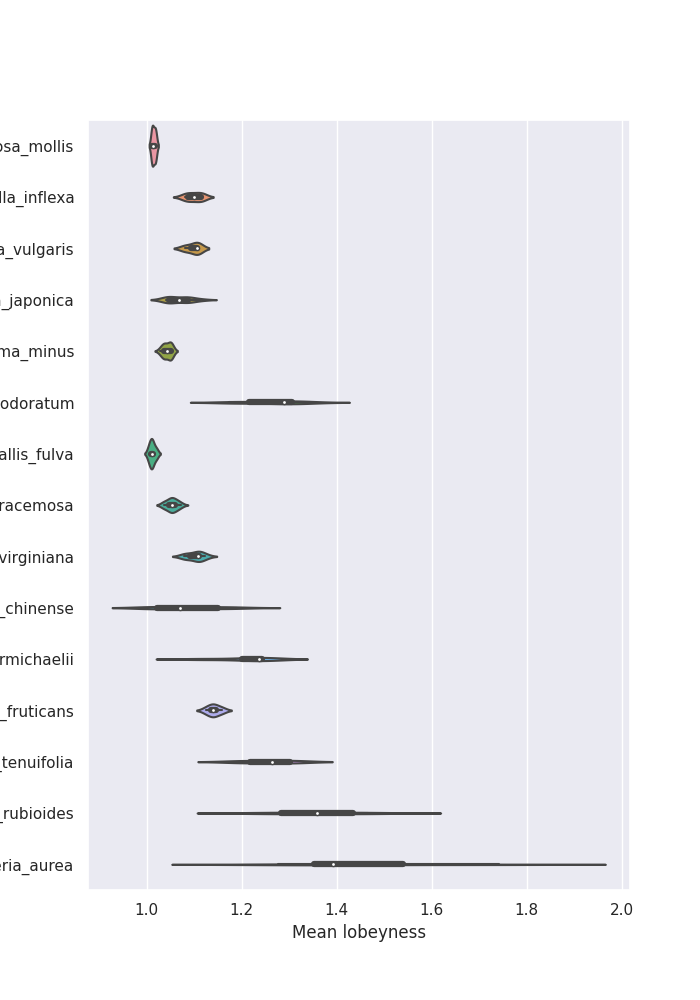

<AxesSubplot: xlabel='Mean lobeyness', ylabel='Specie'>

In [104]:
sns.set(rc={'figure.figsize':(7,10)})

plt.figure()
sns.violinplot(final_df, x="Mean lobeyness", y="Specie")

### Scatter plot

<IPython.core.display.Javascript object>


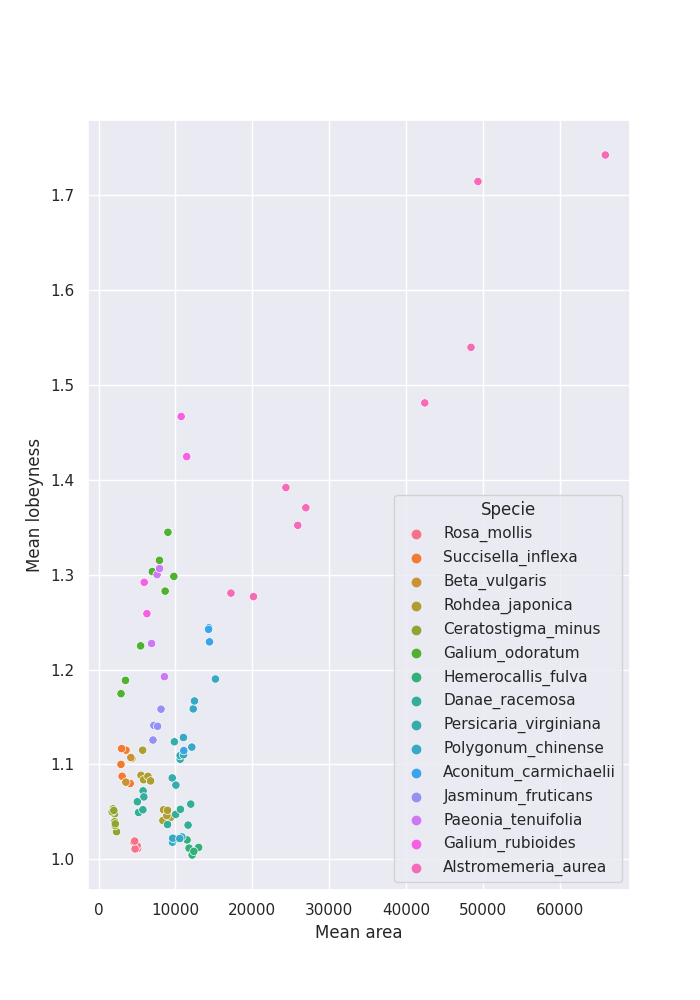

<AxesSubplot: xlabel='Mean area', ylabel='Mean lobeyness'>

In [105]:
plt.figure()

sns.scatterplot(data=final_df, x="Mean area", y="Mean lobeyness", hue="Specie")
